#  Investigate promiscuous esterase dataset

In [19]:
# Helper functions for plotting

import matplotlib as plt 
import seaborn as sns

plt.rcParams['svg.fonttype'] = 'none'  # Ensure text is saved as text
plt.rcParams['figure.figsize'] = (6,6)
sns.set(rc={'figure.figsize': (6,6), 'font.family': 'sans-serif', 'font.sans-serif': 'DejaVu Sans', 'font.size': 12}, 
        style='ticks')

def clean_plt(ax):
    ax.tick_params(direction='out', length=2, width=1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(labelsize=10.0)
    ax.tick_params(axis='x', which='major', pad=2.0)
    ax.tick_params(axis='y', which='major', pad=2.0)
    return ax

### Run MMSeqs2 on promiscuous esterase dataset

In [ ]:
import sys
sys.path.append('/home/helen/enzyme-tk/enzymetk')
from enzymetk.similarity_mmseqs_step import MMseqs
from enzymetk.save_step import Save
import pandas as pd

df_promis_esterases = pd.read_pickle('data/EnzymeCAGE_train_substrate_promiscuity_EC3p1.pkl')

# Run in enzymetk environemnt
id_col = 'UniprotID'
seq_col = 'sequence'
output_dir = 'mmseqs2/'

# Remove sequences with >95% sequence similarity and keep as hold-out set
df_promis_esterases << (MMseqs(id_col, seq_col, tmp_dir=output_dir, method='cluster',  args=['--min-seq-id', '0.95', '-c', '0.8', '--cov-mode', '1']) >> Save(f'{output_dir}promiscuous_esterases_mmseqs2_0p95_similarity.pkl'))

--------------------------------------------------------------------------------
Running command	mmseqs easy-cluster mmseqs2//seqs.fasta mmseqs2//clusterRes mmseqs2//tmp --min-seq-id 0.95 -c 0.8 --cov-mode 1	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------
easy-cluster mmseqs2//seqs.fasta mmseqs2//clusterRes mmseqs2//tmp --min-seq-id 0.95 -c 0.8 --cov-mode 1 

MMseqs Version:                     	17.b804f
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,pr

UniprotID  RHEA_ID DIRECTION  MASTER_ID  \
0     A0A023W421    53744        UN      53744   
1     A0A023W421    13953        UN      13953   
2     A0A0G2JXT6    45632        UN      45632   
3     A0A0G2JXT6    39019        UN      39019   
4     A0A0G2JXT6    12316        UN      12316   
...          ...      ...       ...        ...   
7189      V6CIV8    10684        UN      10684   
7190      V6CIV8    20629        UN      20629   
7191      V6CIV8    47004        UN      47004   
7192      W7K139    15801        UN      15801   
7193      W7K139    41223        UN      41223   

                                                 SMILES           EC number  \
0     *P(=O)([O-])OC[C@H]1O[C@@H](N2C=NC3=C(N)N=CN=C...            3.1.1.96   
1     *[C@@H]([NH3+])C(=O)O[C@H]1[C@@H](O)[C@H](N2C=...            3.1.1.96   
2     CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...            3.1.3.95   
3     *C(=O)OC[C@]([H])(COP(=O)([O-])O[C@@H]1[C@H](O...            3.1.3.95   
4     *C(=O)OC[C@]([H])(COP(=O)([O-])O[C@@H]1[C@H](O...            3.1.3.95   
...                                                 ...                 ...   
7189     *N[C@@H](CC1=CC=C(OP(=O)([O-])[O-])C=C1)C(*)=O  3.1.3.16; 3.1.3.48   
7190                  *N[C@@H](COP(=O)([O-])[O-])C(*)=O  3.1.3.16; 3.1.3.48   
7191           *N[C@H](C(*)=O)[C@@H](C)OP(=O)([O-])[O-]  3.1.3.16; 3.1.3.48   
7192  [1*]C(=O)OC[C@]([H])(COP(=O)([O-])OCC[N+](C)(C...             3.1.1.4   
7193  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N...             3.1.1.4   

                                        CANO_RXN_SMILES  \
0     *P(=O)(O)OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H...   
1     *[C@@H](N)C(=O)O[C@H]1[C@@H](O)[C@H](n2cnc3c(N...   
2     CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
3     *C(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)[C@H](...   
4     *C(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)[C@H](...   
...                                                 ...   
7189  *N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(*)=O.O>>*N[C@...   
7190  *N[C@@H](COP(=O)(O)O)C(*)=O.O>>*N[C@@H](CO)C(*...   
7191  *N[C@H](C(*)=O)[C@@H](C)OP(=O)(O)O.O>>*N[C@H](...   
7192  O.[1*]C(=O)OC[C@H](COP(=O)(O)OCC[N+](C)(C)C)OC...   
7193  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCC[N+](...   

                                               sequence  \
0     MKLVVQRVTDASVTVDGAVAGRIGPGIMALVGVTHEDTEEDAAYLA...   
1     MKLVVQRVTDASVTVDGAVAGRIGPGIMALVGVTHEDTEEDAAYLA...   
2     MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
3     MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
4     MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
...                                                 ...   
7189  MTTHLPSTSQNGEEISAEQFNRIFHERNVIVLDCRSNGDSVKRANR...   
7190  MTTHLPSTSQNGEEISAEQFNRIFHERNVIVLDCRSNGDSVKRANR...   
7191  MTTHLPSTSQNGEEISAEQFNRIFHERNVIVLDCRSNGDSVKRANR...   
7192  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   
7193  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   

                                       reverse_template  n_seq  ...  \
0     [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    147  ...   
1     [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    147  ...   
2     [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
3     [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
4     [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
...                                                 ...    ...  ...   
7189  [O-;H0;D1:7]-[P;H0;D4;+0:2](-[O;-;D1;H0:3])(=[...    381  ...   
7190                                                NaN    381  ...   
7191  [C:1]-[OH;D1;+0:2].[O-;H0;D1:7]-[P;H0;D4;+0:3]...    381  ...   
7192  [C;D1;H0:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D...    679  ...   
7193  [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    679  ...   

     direct_weight rank_weight_light  rank_weight_hard  \
0         0.758806               0.9          0.500000   
1         0.758806               0.5          0.166667   
2         0.

### Remove sequences that are more than 95% similar

In [12]:
import pandas as pd 

df_promis_esterases_mmseqs_95 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/mmseqs2/promiscuous_esterases_mmseqs2_0p95_similarity.pkl')
df_promis_esterases_mmseqs_95 = df_promis_esterases_mmseqs_95.rename(columns={'mmseqs_representative_cluster_seq': 'mmseqs2_clusters_0p95_similarity'})

# Filter condition to only keep cluster centroids from MMSeqs2
mask = df_promis_esterases_mmseqs_95['UniprotID'] == df_promis_esterases_mmseqs_95['mmseqs2_clusters_0p95_similarity']

# df with kept sequences
df_kept = df_promis_esterases_mmseqs_95[mask]
#df_kept.to_pickle('/nvme2/helen/masterthesis/manuscript/trainingdata/promiscuous_esterases_removed_95per_similar_seqs.pkl')

# DataFrame with removed sequences (the complement)
df_removed = df_promis_esterases_mmseqs_95[~mask]
#df_kept.to_pickle('/nvme2/helen/masterthesis/manuscript/trainingdata/promiscuous_esterases_heldout_set_95per_similar_seqs.pkl')

### Sequence length distribution

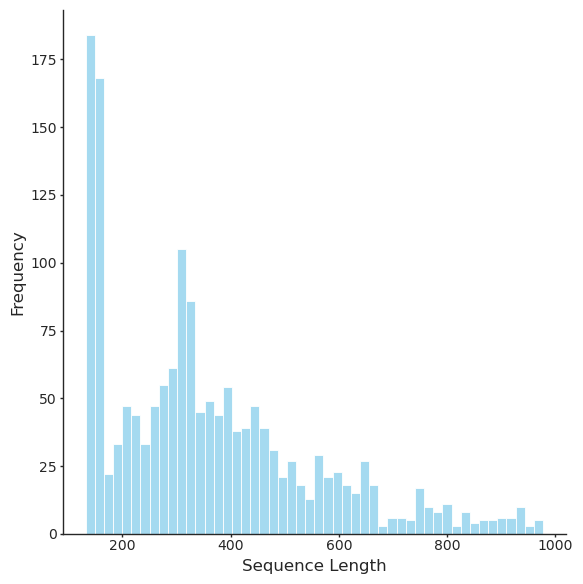

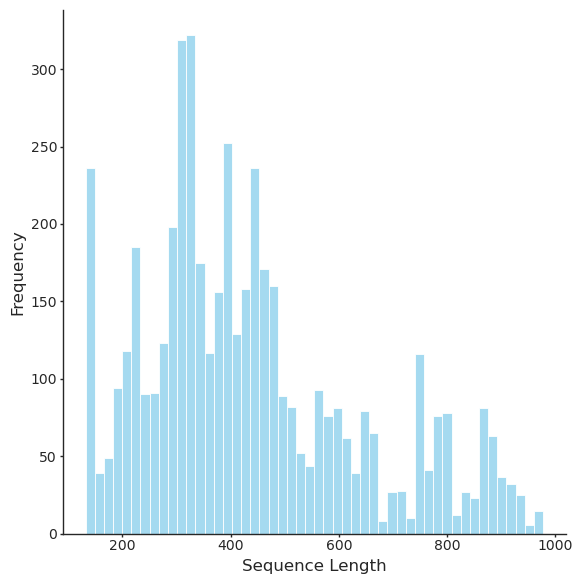

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sequence_length_histogram_from_df(df, sequence_column="sequence", bins=50):
    sequence_lengths = df[sequence_column].apply(len)

    fig, ax = plt.subplots()
    sns.histplot(sequence_lengths, bins=bins, color='skyblue', ax=ax)

    ax.set_xlabel("Sequence Length", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.set_title("", fontsize=12)

    clean_plt(ax)
    plt.tight_layout()
    plt.show()

df_unique = df_kept.drop_duplicates(subset='UniprotID')
plot_sequence_length_histogram_from_df(df_unique)

# Look at short sequences
short_sequences = df_unique[df_unique["sequence"].apply(len) < 180]
# Short sequences are almost all d-aminoacyl-tRNA deacylases with E.C 3.1.1.96

# Remove all d-aminoacyl-tRNA deacylases by removing sequences with E.C 3.1.1.96
df_removed_short_sequences = df_kept[~df_kept['EC number'].fillna('').str.contains(r'\b3\.1\.1\.96\b')]
plot_sequence_length_histogram_from_df(df_removed_short_sequences)
#df_removed_short_sequences.to_pickle('/nvme2/helen/masterthesis/manuscript/trainingdata/promiscuous_esterases_short_seq_removed.pkl')

### Total number of unique substrates per EC class

/tmp/ipykernel_1611434/275014962.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


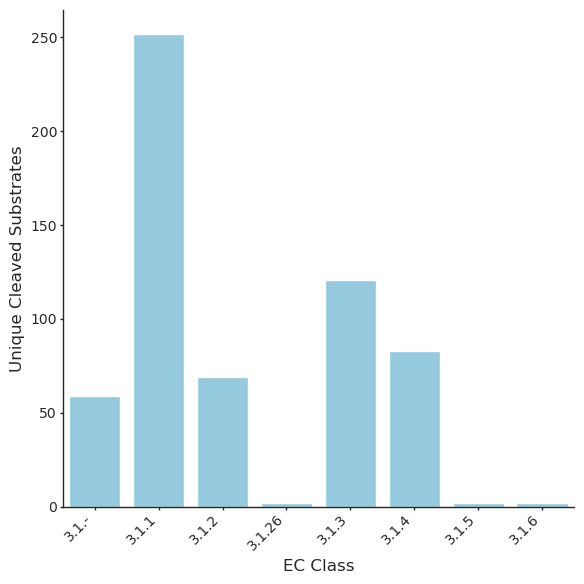

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
import seaborn as sns

df = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/trainingdata/promiscuous_esterases_short_seq_removed.pkl')

# Extract EC class (first 3 digits of EC number)
df['EC_prefix'] = df['EC number'].apply(
    lambda x: '.'.join(x.split('.')[:3]) if isinstance(x, str) else None
)

# Canonicalize cleaved substrate SMILES
def canonicalize_first(smiles_list):
    if isinstance(smiles_list, list) and len(smiles_list) > 0:
        try:
            mol = Chem.MolFromSmiles(smiles_list[0])
            return Chem.MolToSmiles(mol) if mol else None
        except:
            return None
    return None

df['canonical_cleaved_substrate'] = df['cleaved_substrate'].apply(canonicalize_first)

# Drop any rows with invalid data
df_filtered = df.dropna(subset=['canonical_cleaved_substrate', 'EC_prefix'])

# Count unique cleaved substrates per EC class
unique_cleaved_counts = (
    df_filtered.groupby('EC_prefix')['canonical_cleaved_substrate']
    .nunique()
    .reset_index(name='unique_cleaved_substrate_count')
)

# Plotting
fig, ax = plt.subplots()
sns.barplot(
    data=unique_cleaved_counts,
    x='EC_prefix',
    y='unique_cleaved_substrate_count',
    color='skyblue',
    ax=ax
)

ax.set_ylabel('Unique Cleaved Substrates', fontsize=12)
ax.set_xlabel('EC Class', fontsize=12)
ax.set_title('', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.tick_params(labelsize=8.0)

# Apply custom axis styling
clean_plt(ax)
plt.tight_layout()
plt.show()


### Embed protein sequences using ESM2

In [1]:
import sys
from enzymetk.embedprotein_esm_step import EmbedESM
from enzymetk.save_step import Save
import pandas as pd

# run in enzymetk environemnt
df = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/trainingdata/promiscuous_esterases_short_seq_removed.pkl')
df_filtered = df.drop_duplicates(subset='UniprotID', keep='first')
id_col = 'UniprotID'
seq_col = 'sequence'
output_dir = 'esm2/'

df_filtered << (EmbedESM(id_col, seq_col, extraction_method='mean', tmp_dir=output_dir) >> Save(f'{output_dir}promiscuous_esterases_esm2_embedded.pkl'))

--------------------------------------------------------------------------------
Running command	conda run -n enzymetk python /home/helen/miniconda3/envs/enzymetk/lib/python3.11/site-packages/enzymetk/esm-extract.py esm2_t33_650M_UR50D esm2//input.fasta esm2/ --include per_tok	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------
Transferred model to GPU
Read esm2/input.fasta with 0 sequences


--------------------------------------------------------------------------------
                                    Error:		                                    
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
       

100%|██████████| 1241/1241 [00:01<00:00, 851.48it/s]

0 0 0



/home/helen/miniconda3/envs/enzymetk/lib/python3.11/site-packages/enzymetk/embedprotein_esm_step.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embedding'] = tensors


UniprotID  RHEA_ID DIRECTION  MASTER_ID  \
2     A0A0G2JXT6    45632        UN      45632   
6     A0A0H2V660    60392        UN      60392   
14    A0A0H2V871    60420        UN      60420   
18    A0A0H2ZFK2    20630        LR      20629   
20    A0A0H3KNC4    75223        UN      75223   
...          ...      ...       ...        ...   
7179      Q9ZV25    20629        UN      20629   
7181      Q9ZW21    47004        UN      47004   
7183      S4TF94    40112        LR      40111   
7189      V6CIV8    10684        UN      10684   
7192      W7K139    15801        UN      15801   

                                                 SMILES           EC number  \
2     CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...            3.1.3.95   
6     [H][C@]12COC(=O)[C@]3([H])COC(=O)[C@]([H])(COC...           3.1.1.109   
14    O=C(N[C@H]1COC(=O)[C@@H](NC(=O)C2=CC([C@@H]3O[...           3.1.1.107   
18                    *N[C@@H](COP(=O)([O-])[O-])C(*)=O  3.1.3.16; 3.1.3.48   
20           [H][C@]1([C@H](C)O)OC(=O)[C@@H](O)[C@@H]1O           3.1.1.120   
...                                                 ...                 ...   
7179                  *N[C@@H](COP(=O)([O-])[O-])C(*)=O            3.1.3.16   
7181           *N[C@H](C(*)=O)[C@@H](C)OP(=O)([O-])[O-]            3.1.3.16   
7183  CCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O...             3.1.2.-   
7189     *N[C@@H](CC1=CC=C(OP(=O)([O-])[O-])C=C1)C(*)=O  3.1.3.16; 3.1.3.48   
7192  [1*]C(=O)OC[C@]([H])(COP(=O)([O-])OCC[N+](C)(C...             3.1.1.4   

                                        CANO_RXN_SMILES  \
2     CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
6     O.O=C1N[C@H]2COC(=O)[C@@H]3COC(=O)[C@H](COC2=O...   
14    O.O=C(N[C@H]1COC(=O)[C@@H](NC(=O)c2cc([C@@H]3O...   
18    *N[C@@H](COP(=O)(O)O)C(*)=O.O>>*N[C@@H](CO)C(*...   
20    C[C@H](O)[C@H]1OC(=O)[C@@H](O)[C@@H]1O.O>>C[C@...   
...                                                 ...   
7179  *N[C@@H](COP(=O)(O)O)C(*)=O.O>>*N[C@@H](CO)C(*...   
7181  *N[C@H](C(*)=O)[C@@H](C)OP(=O)(O)O.O>>*N[C@H](...   
7183  CCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O...   
7189  *N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(*)=O.O>>*N[C@...   
7192  O.[1*]C(=O)OC[C@H](COP(=O)(O)OCC[N+](C)(C)C)OC...   

                                               sequence  \
2     MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
6     MIDKNQTCGVGQDSVPYMICLIHILEEWFGVEQLEDYLNFANYLLW...   
14    MYAREYRSTRPHKAIFFHLSCLTLICSAQVYAKPDMRPLGPNIADK...   
18    MHRSPLAWLRLLLAAVLGAFLLGGPLHAAETAAPRSPAWAQAVDPS...   
20    MGALRIDSHQHFWRYRAADYPWIGAGMGVLARDYLPDALHPLMHAQ...   
...                                                 ...   
7179  MGNGIGKLSKCLTGGAGRNKKPELSILEPDPLDEGLGHSFCYVRPD...   
7181  MAEICYEVVTDACPSSVYESTPAHSRRRPRFQTVMHEDWEKNCKRS...   
7183  MMTPIGIRIRKQIPLSYHYSSIQALLSRFTPTPYNPISNSSSSTQT...   
7189  MTTHLPSTSQNGEEISAEQFNRIFHERNVIVLDCRSNGDSVKRANR...   
7192  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   

                                       reverse_template  n_seq  ...  \
2     [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
6     [#7:1]-[C:2](-[CH2;D2;+0:3]-[OH;D1;+0:10])-[C:...    324  ...   
14    [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    318  ...   
18                                                  NaN    218  ...   
20    [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    296  ...   
...                                                 ...    ...  ...   
7179                                                NaN    654  ...   
7181  [C:1]-[OH;D1;+0:2].[O-;H0;D1:7]-[P;H0;D4;+0:3]...    362  ...   
7183                                                NaN    527  ...   
7189  [O-;H0;D1:7]-[P;H0;D4;+0:2](-[O;-;D1;H0:3])(=[...    381  ...   
7192  [C;D1;H0:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D...    679  ...   

     rank_weight_light rank_weight_hard  \
2                  0.6             0.20   
6                  1.0             1.00   
14                 1.0             1.00   
18            

### Embed substrates using UniMol

In [25]:
# Embed substrates using unimol
from enzymetk.embedchem_unimol_step import UniMol
from enzymetk.save_step import Save
import pandas as pd
from rdkit import Chem

# run in enzymetk environemnt
df = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/trainingdata/promiscuous_esterases_short_seq_removed.pkl')
smiles_col = 'canonical_cleaved_substrate'
output_dir = 'unimol/'

# Remove rows where any SMILES string in the list contains '*' or is '[H+]'. These cannot be embedded using unimol. 
def is_valid_smiles(smi):
    return isinstance(smi, str) and '*' not in smi and smi.strip() != '[H+]'

# Canonicalize cleaved substrate SMILES
def canonicalize_first(smiles_list):
    if isinstance(smiles_list, list) and len(smiles_list) > 0:
        try:
            mol = Chem.MolFromSmiles(smiles_list[0])
            return Chem.MolToSmiles(mol) if mol else None
        except:
            return None
    return None

# Get df with only valid substrate smiles that can be embedded by unimol
df['canonical_cleaved_substrate'] = df['cleaved_substrate'].apply(canonicalize_first)
df['valid_unimol_substrate'] = df['canonical_cleaved_substrate'].apply(is_valid_smiles)
df_valid = df[df['valid_unimol_substrate'] == True].copy()

df_valid << (UniMol(smiles_col) >> Save(f'{output_dir}promiscuous_esterases_unique_substrates_unimol_embedded.pkl'))

2025-06-18 16:36:23 | unimol_tools/models/unimolv2.py | 161 | INFO | Uni-Mol Tools | Loading pretrained weights from /home/helen/miniconda3/envs/enzymetk/lib/python3.11/site-packages/unimol_tools/weights/modelzoo/164M/checkpoint.pt
2025-06-18 16:36:24 | unimol_tools/data/conformer.py | 437 | INFO | Uni-Mol Tools | Start generating conformers...
1it [00:00,  2.35it/s]
2025-06-18 16:36:25 | unimol_tools/data/conformer.py | 452 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 100.00% of molecules.
2025-06-18 16:36:25 | unimol_tools/data/conformer.py | 469 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 0.00% of molecules.
2025-06-18 16:36:25 | unimol_tools/data/conformer.py | 478 | INFO | Uni-Mol Tools | Failed 3d conformers indices: [0]
2025-06-18 16:36:25 | unimol_tools/tasks/trainer.py | 78 | INFO | Uni-Mol Tools | Number of GPUs available: 2
2025-06-18 16:36:25 | unimol_tools/tasks/trainer.py | 98 | INFO | Uni-Mol Tools | Using single GPU.
100%|██████

UniprotID  RHEA_ID DIRECTION  MASTER_ID  \
2     A0A0G2JXT6    45632        UN      45632   
6     A0A0H2V660    60392        UN      60392   
14    A0A0H2V871    60420        UN      60420   
20    A0A0H3KNC4    75223        UN      75223   
35    A0A1S3ZP85    38487        UN      38487   
...          ...      ...       ...        ...   
7119      Q9Z0S1    15553        UN      15553   
7122      Q9Z0Y2    54456        UN      54456   
7157      Q9Z2C5    45636        UN      45636   
7162      Q9Z2C9    57840        UN      57840   
7183      S4TF94    40112        LR      40111   

                                                 SMILES          EC number  \
2     CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...           3.1.3.95   
6     [H][C@]12COC(=O)[C@]3([H])COC(=O)[C@]([H])(COC...          3.1.1.109   
14    O=C(N[C@H]1COC(=O)[C@@H](NC(=O)C2=CC([C@@H]3O[...          3.1.1.107   
20           [H][C@]1([C@H](C)O)OC(=O)[C@@H](O)[C@@H]1O          3.1.1.120   
35                    CCCCCCCC/C=C\CCCCCCCC(=O)OCC(O)CO            3.1.1.-   
...                                                 ...                ...   
7119  O=P([O-])([O-])O[C@H]1[C@H](O)[C@@H](O)[C@H](O...  3.1.3.57; 3.1.3.7   
7122  CCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N+]...            3.1.1.4   
7157  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@...           3.1.3.95   
7162  O=P([O-])([O-])O[C@@H]1[C@H](O)[C@H](OP(=O)([O...           3.1.3.64   
7183  CCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O...            3.1.2.-   

                                        CANO_RXN_SMILES  \
2     CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
6     O.O=C1N[C@H]2COC(=O)[C@@H]3COC(=O)[C@H](COC2=O...   
14    O.O=C(N[C@H]1COC(=O)[C@@H](NC(=O)c2cc([C@@H]3O...   
20    C[C@H](O)[C@H]1OC(=O)[C@@H](O)[C@@H]1O.O>>C[C@...   
35    CCCCCCCC/C=C\CCCCCCCC(=O)OCC(O)CO.O>>CCCCCCCC/...   
...                                                 ...   
7119  O.O=P(O)(O)O[C@H]1[C@H](O)[C@@H](O)[C@H](OP(=O...   
7122  CCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCC[N+](C)...   
7157  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1...   
7162  O.O=P(O)(O)O[C@@H]1[C@H](O)[C@H](OP(=O)(O)O)[C...   
7183  CCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O...   

                                               sequence  \
2     MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
6     MIDKNQTCGVGQDSVPYMICLIHILEEWFGVEQLEDYLNFANYLLW...   
14    MYAREYRSTRPHKAIFFHLSCLTLICSAQVYAKPDMRPLGPNIADK...   
20    MGALRIDSHQHFWRYRAADYPWIGAGMGVLARDYLPDALHPLMHAQ...   
35    MASTKIDDKVSIPGPVTGTGNSRFLIVSHENGGIWDLVRFGVWGNK...   
...                                                 ...   
7119  MASSHTVLMRLVASAYSIAQKAGTIVRCVIAEGDLGIVQKTSATDL...   
7122  MKLLLLAALLTAGAAAHSISPRAVWQFRNMIKCTIPGSDPLKDYNN...   
7157  MASASASKYNSHSLENESIKKVSQDGVSQDVSETVPRLPGELLITE...   
7162  MEHIRTPKVENVRLVDRVSCKKAALGTLYLTATHVIFVENAPDTRK...   
7183  MMTPIGIRIRKQIPLSYHYSSIQALLSRFTPTPYNPISNSSSSTQT...   

                                       reverse_template  n_seq  ...  \
2     [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
6     [#7:1]-[C:2](-[CH2;D2;+0:3]-[OH;D1;+0:10])-[C:...    324  ...   
14    [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    318  ...   
20    [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    296  ...   
35    [C:1]-[CH2;D2;+0:2]-[OH;D1;+0:6].[O-;H0;D1:3]-...    572  ...   
...                                                 ...    ...  ...   
7119  [C:1]-[OH;D1;+0:2].[O-;H0;D1:7]-[P;H0;D4;+0:3]...    308  ...   
7122  [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    146  ...   
7157  [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    603  ...   
7162  [C:1]-[OH;D1;+0:2].[O-;H0;D1:7]-[P;H0;D4;+0:3]...    660  ...   
7183                                                NaN    527  ...   

                                             substrates  \
2     CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...   
6     [H][C@]12COC(=O)[C@]3([H])COC(=O)[C@]([H])(COC...   
14    O=C(N[C@H]1COC(

### Run MMSeqs2 with 50% sequence similarity

In [2]:
import sys
sys.path.append('/home/helen/enzyme-tk/enzymetk')
from enzymetk.similarity_mmseqs_step import MMseqs
from enzymetk.save_step import Save
import pandas as pd

df = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/trainingdata/promiscuous_esterases_short_seq_removed.pkl')

# Run in enzymetk environemnt
id_col = 'UniprotID'
seq_col = 'sequence'
output_dir = 'mmseqs2/'

# Remove sequences with >50% sequence similarity 
df << (MMseqs(id_col, seq_col, tmp_dir=output_dir, method='cluster',  args=['--min-seq-id', '0.5', '-c', '0.8', '--cov-mode', '1']) >> Save(f'{output_dir}promiscuous_esterases_mmseqs2_0p5_similarity.pkl'))

--------------------------------------------------------------------------------
Running command	mmseqs easy-cluster mmseqs2//seqs.fasta mmseqs2//clusterRes mmseqs2//tmp --min-seq-id 0.5 -c 0.8 --cov-mode 1	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                                    Output:	                                    
--------------------------------------------------------------------------------
easy-cluster mmseqs2//seqs.fasta mmseqs2//clusterRes mmseqs2//tmp --min-seq-id 0.5 -c 0.8 --cov-mode 1 

MMseqs Version:                     	17.b804f
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof

UniprotID  RHEA_ID DIRECTION  MASTER_ID  \
0     A0A0G2JXT6    45632        UN      45632   
1     A0A0G2JXT6    39019        UN      39019   
2     A0A0G2JXT6    12316        UN      12316   
3     A0A0G2JXT6    42328        UN      42328   
4     A0A0H2V660    60392        UN      60392   
...          ...      ...       ...        ...   
4880      V6CIV8    10684        UN      10684   
4881      V6CIV8    20629        UN      20629   
4882      V6CIV8    47004        UN      47004   
4883      W7K139    15801        UN      15801   
4884      W7K139    41223        UN      41223   

                                                 SMILES           EC number  \
0     CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...            3.1.3.95   
1     *C(=O)OC[C@]([H])(COP(=O)([O-])O[C@@H]1[C@H](O...            3.1.3.95   
2     *C(=O)OC[C@]([H])(COP(=O)([O-])O[C@@H]1[C@H](O...            3.1.3.95   
3     CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...            3.1.3.95   
4     [H][C@]12COC(=O)[C@]3([H])COC(=O)[C@]([H])(COC...           3.1.1.109   
...                                                 ...                 ...   
4880     *N[C@@H](CC1=CC=C(OP(=O)([O-])[O-])C=C1)C(*)=O  3.1.3.16; 3.1.3.48   
4881                  *N[C@@H](COP(=O)([O-])[O-])C(*)=O  3.1.3.16; 3.1.3.48   
4882           *N[C@H](C(*)=O)[C@@H](C)OP(=O)([O-])[O-]  3.1.3.16; 3.1.3.48   
4883  [1*]C(=O)OC[C@]([H])(COP(=O)([O-])OCC[N+](C)(C...             3.1.1.4   
4884  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N...             3.1.1.4   

                                        CANO_RXN_SMILES  \
0     CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
1     *C(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)[C@H](...   
2     *C(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)[C@H](...   
3     CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
4     O.O=C1N[C@H]2COC(=O)[C@@H]3COC(=O)[C@H](COC2=O...   
...                                                 ...   
4880  *N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(*)=O.O>>*N[C@...   
4881  *N[C@@H](COP(=O)(O)O)C(*)=O.O>>*N[C@@H](CO)C(*...   
4882  *N[C@H](C(*)=O)[C@@H](C)OP(=O)(O)O.O>>*N[C@H](...   
4883  O.[1*]C(=O)OC[C@H](COP(=O)(O)OCC[N+](C)(C)C)OC...   
4884  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCC[N+](...   

                                               sequence  \
0     MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
1     MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
2     MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
3     MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
4     MIDKNQTCGVGQDSVPYMICLIHILEEWFGVEQLEDYLNFANYLLW...   
...                                                 ...   
4880  MTTHLPSTSQNGEEISAEQFNRIFHERNVIVLDCRSNGDSVKRANR...   
4881  MTTHLPSTSQNGEEISAEQFNRIFHERNVIVLDCRSNGDSVKRANR...   
4882  MTTHLPSTSQNGEEISAEQFNRIFHERNVIVLDCRSNGDSVKRANR...   
4883  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   
4884  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   

                                       reverse_template  n_seq  ...  \
0     [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
1     [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
2     [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
3     [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
4     [#7:1]-[C:2](-[CH2;D2;+0:3]-[OH;D1;+0:10])-[C:...    324  ...   
...                                                 ...    ...  ...   
4880  [O-;H0;D1:7]-[P;H0;D4;+0:2](-[O;-;D1;H0:3])(=[...    381  ...   
4881                                                NaN    381  ...   
4882  [C:1]-[OH;D1;+0:2].[O-;H0;D1:7]-[P;H0;D4;+0:3]...    381  ...   
4883  [C;D1;H0:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D...    679  ...   
4884  [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    679  ...   

     rank_weight_light rank_weight_hard  \
0                  0.6         0.200000   
1                  0.5         0.142857   
2                  0.5         0.125000   
3             

### Integrate everything in one df

In [18]:

df_mmseqs2_0p5 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/mmseqs2/promiscuous_esterases_mmseqs2_0p5_similarity.pkl')
df_mmseqs2_0p5 = df_mmseqs2_0p5.rename(columns={'mmseqs_representative_cluster_seq': 'mmseqs2_clusters_0p5_similarity'})

df_esm2 = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/esm2/promiscuous_esterases_esm2_embedded.pkl')
df_unimol = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/unimol/promiscuous_esterases_unique_substrates_unimol_embedded.pkl')

# Add esm2 embeddings
df_mmseqs2_esm2 = df_mmseqs2_0p5.merge(df_esm2[['UniprotID', 'embedding']], on='UniprotID', how='left')

# Ensure cleaved_substrate is a string for both dataframes
df_mmseqs2_esm2['cleaved_substrate'] = df_mmseqs2_esm2['cleaved_substrate'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None
)

df_unimol['cleaved_substrate'] = df_unimol['cleaved_substrate'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None
)

# Add unimol_repr column 
df_mmseqs2_esm2_unimol = df_mmseqs2_esm2.merge(
    df_unimol[['cleaved_substrate', 'unimol_repr']],       # Columns to bring from the right DF
    on='cleaved_substrate',                              # Columns to match on
    how='left'                                           # Keep all rows from df_mmseqs2_esm2
)

df_mmseqs2_esm2_unimol

UniprotID  RHEA_ID DIRECTION  MASTER_ID  \
0      A0A0G2JXT6    45632        UN      45632   
1      A0A0G2JXT6    45632        UN      45632   
2      A0A0G2JXT6    45632        UN      45632   
3      A0A0G2JXT6    45632        UN      45632   
4      A0A0G2JXT6    45632        UN      45632   
...           ...      ...       ...        ...   
10838      W7K139    41223        UN      41223   
10839      W7K139    41223        UN      41223   
10840      W7K139    41223        UN      41223   
10841      W7K139    41223        UN      41223   
10842      W7K139    41223        UN      41223   

                                                  SMILES EC number  \
0      CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...  3.1.3.95   
1      CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...  3.1.3.95   
2      CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...  3.1.3.95   
3      CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...  3.1.3.95   
4      CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...  3.1.3.95   
...                                                  ...       ...   
10838  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N...   3.1.1.4   
10839  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N...   3.1.1.4   
10840  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N...   3.1.1.4   
10841  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N...   3.1.1.4   
10842  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)([O-])OCC[N...   3.1.1.4   

                                         CANO_RXN_SMILES  \
0      CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
1      CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
2      CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
3      CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
4      CCCCCCCC(=O)OC[C@H](COP(=O)(O)O[C@@H]1[C@H](O)...   
...                                                  ...   
10838  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCC[N+](...   
10839  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCC[N+](...   
10840  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCC[N+](...   
10841  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCC[N+](...   
10842  CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OCC[N+](...   

                                                sequence  \
0      MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
1      MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
2      MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
3      MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
4      MEHIRTTKVEQVKLLDRFSTNNKSLTGTLYLTATHLLFIDAHQKET...   
...                                                  ...   
10838  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   
10839  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   
10840  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   
10841  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   
10842  MSDDDDKIYIYSDLFSKNFSDDEKDDSYEREKQVYSGSETQNAENE...   

                                        reverse_template  n_seq  ...  \
0      [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
1      [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
2      [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
3      [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
4      [C:1]-[OH;D1;+0:2].[O;-;D1;H0:4]-[P;H0;D4;+0:3...    655  ...   
...                                                  ...    ...  ...   
10838  [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    679  ...   
10839  [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    679  ...   
10840  [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    679  ...   
10841  [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    679  ...   
10842  [C:4]-[C;H0;D3;+0:3](-[O-;H0;D1:6])=[O;D1;H0:5...    679  ...   

                                              substrates  \
0      CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...   
1      CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...   
2      CCCCCCCC(=O)OC[C@H](COP(=O)([O-])O[C@@H]1[C@H]...   
3      

### Calculate pairwise sequence similarity between cluster representatives of MMSeqs2 clusters

In [30]:
from Bio import pairwise2
import numpy as np
import pandas as pd

df = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/mmseqs2/promiscuous_esterases_mmseqs2_0p5_similarity.pkl')
df = df.rename(columns={'mmseqs_representative_cluster_seq': 'mmseqs2_clusters_0p5_similarity'})
cluster_col = 'mmseqs2_clusters_0p5_similarity'
sequence_col = 'sequence'

def pairwise_cluster_seq_similarity(df, sequence_col, cluster_col): 

    # Get one representative sequence per cluster
    representatives_df = df.groupby(cluster_col).first().reset_index()
    cluster_ids = representatives_df[cluster_col].tolist()
    sequences = representatives_df[sequence_col].tolist()

    def sequence_identity(seq1, seq2):
        alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
        matches = alignments[0][2]
        return matches / max(len(seq1), len(seq2))

    # Compute similarity matrix
    n = len(sequences)
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            sim = sequence_identity(sequences[i], sequences[j])
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim

    return similarity_matrix

similarity_matrix = pairwise_cluster_seq_similarity(df, sequence_col, cluster_col)
np.save("pairwise_similarity_matrix.npy", similarity_matrix)

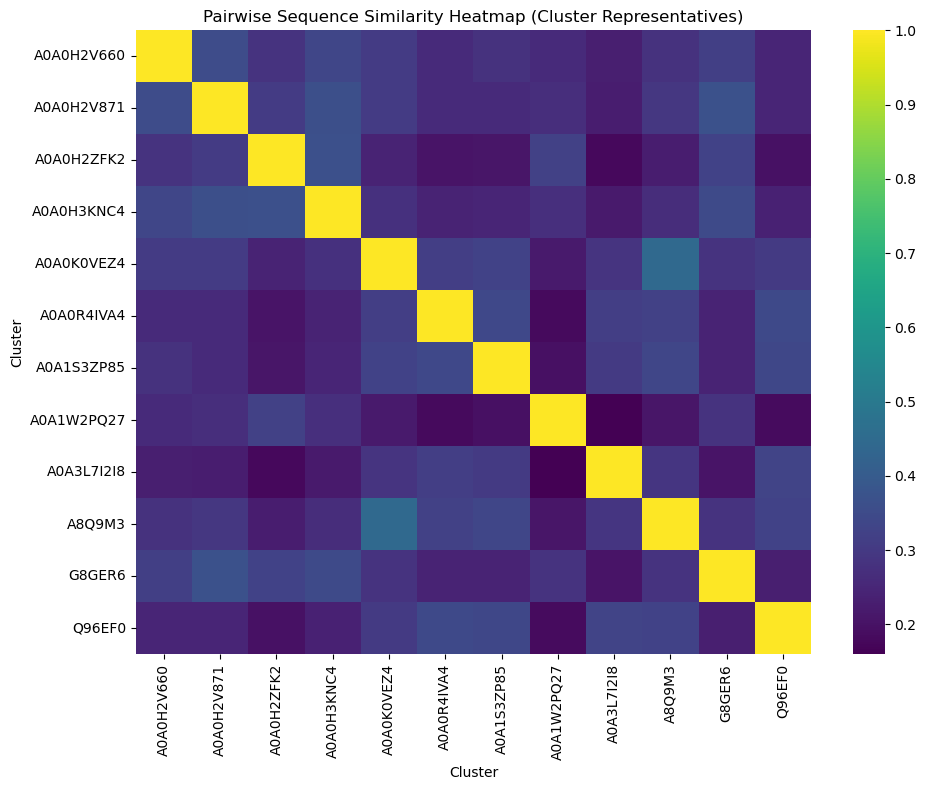

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import pairwise2

def pairwise_cluster_seq_similarity(df, sequence_col, cluster_col): 
    # Get one representative sequence per cluster
    representatives_df = df.groupby(cluster_col).first().reset_index()
    cluster_ids = representatives_df[cluster_col].tolist()
    sequences = representatives_df[sequence_col].tolist()

    def sequence_identity(seq1, seq2):
        alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
        matches = alignments[0][2]
        return matches / max(len(seq1), len(seq2))

    # Compute similarity matrix
    n = len(sequences)
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            sim = sequence_identity(sequences[i], sequences[j])
            similarity_matrix[i, j] = sim
            similarity_matrix[j, i] = sim

    return similarity_matrix, cluster_ids

# === Example usage ===
similarity_matrix, cluster_ids = pairwise_cluster_seq_similarity(df, sequence_col='sequence', cluster_col='mmseqs2_clusters_0p5_similarity')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=cluster_ids, yticklabels=cluster_ids, cmap='viridis', annot=False)
plt.title('Pairwise Sequence Similarity Heatmap (Cluster Representatives)')
plt.xlabel('Cluster')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


### Average pair-wise tanimoto similarity of substrates between clusters

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import pandas as pd
import numpy as np

# Group canonical substrates per cluster
cluster_substrates = df.groupby('cluster_col')['canonical_cleaved_substrate'].apply(list)
cluster_ids = cluster_substrates.index.tolist()

def get_fingerprints(smiles_list):
    fps = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        if mol:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
            fps.append(fp)
    return fps

cluster_fps = cluster_substrates.apply(get_fingerprints)

def average_tanimoto(fps1, fps2):
    if not fps1 or not fps2:
        return np.nan
    sims = [DataStructs.TanimotoSimilarity(fp1, fp2) for fp1 in fps1 for fp2 in fps2]
    return np.mean(sims)

n = len(cluster_ids)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i, n):
        sim = average_tanimoto(cluster_fps.iloc[i], cluster_fps.iloc[j])
        similarity_matrix[i, j] = sim
        similarity_matrix[j, i] = sim


# Plot as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_sim, cmap="viridis", square=True)
plt.title("Substrate Similarity Between Clusters")
plt.tight_layout()
plt.show()


In [ ]:
# Save as CSV
df_sim = pd.DataFrame(similarity_matrix, index=cluster_ids, columns=cluster_ids)
df_sim.to_csv("substrate_cluster_similarity.csv")

### Plot sequence vs. substrate similarity

### Investigate big clusters

In [31]:
from Bio import pairwise2
import numpy as np
import pandas as pd

def one_vs_all_cluster_seq_similarity(df, sequence_col, cluster_col):
    """
    Computes a 1D scalar for cluster coloring based on sequence similarity,
    comparing each cluster's representative sequence to a single reference sequence.
    """

    # Get one representative sequence per cluster
    representatives_df = df.groupby(cluster_col).first().reset_index()
    cluster_ids = representatives_df[cluster_col].tolist()
    representative_sequences = representatives_df[sequence_col].tolist()

    def sequence_identity(seq1, seq2):
        alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
        if not alignments:
            return 0.0 # Return 0 if no alignment is found (e.g., empty sequences)
        matches = alignments[0][2]
        return matches / max(len(seq1), len(seq2))

    # Choose the reference sequence, here the sequence of the first cluster in df
    reference_sequence = representative_sequences[0] # The 'one' sequence
    # reference_sequence = max(representative_sequences, key=len) # Alternative: The longest representative sequence

    # Compute similarity of each representative sequence to the reference sequence
    similarity_scores = [sequence_identity(seq, reference_sequence) for seq in representative_sequences]
    similarity_scores = np.array(similarity_scores)

    # Normalize to [0, 1] for colormap mapping 
    if similarity_scores.max() == similarity_scores.min():
        normalized_scores = np.zeros_like(similarity_scores)
    else:
        normalized_scores = (similarity_scores - similarity_scores.min()) / (similarity_scores.max() - similarity_scores.min())

    # Map cluster IDs to normalized scalar values
    cluster_scalar_map = dict(zip(cluster_ids, normalized_scores))
    df['one_vs_all_seq_similarity_scalar'] = df[cluster_col].map(cluster_scalar_map)

    return df


df_mmseqs2_esm2_unimol = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2_unimol.pkl')
cluster_col = 'mmseqs_representative_cluster_seq_0p9_similarity'
sequence_col = 'sequence'

df_mmseqs2_esm2_unimol = one_vs_all_cluster_seq_similarity(df_mmseqs2_esm2_unimol.copy(), sequence_col, cluster_col)


### Calculate dimensionality reduced ESM2 embeddings

In [35]:
import umap
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

def calculate_dim_reduced_ESM2_embeddings(df, embedding_col = 'embedding', type = 'UMAP'):
    embeddings = np.vstack(df[embedding_col].to_numpy()) 

    if type == 'UMAP': 
        umap_model = umap.UMAP(n_components=2, random_state=42)
        reduced_embeddings = umap_model.fit_transform(embeddings)
        df['UMAP1_esm2'] = reduced_embeddings[:, 0]
        df['UMAP2_esm2'] = reduced_embeddings[:, 1]
    
    elif type == 't-SNE': 
        tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
        tsne_results = tsne.fit_transform(embeddings)
        df['TSNE1_esm2'] = tsne_results[:, 0]
        df['TSNE2_esm2'] = tsne_results[:, 1]
    
    return df

df_mmseqs2_esm2_unimol = calculate_dim_reduced_ESM2_embeddings(df_mmseqs2_esm2_unimol, embedding_col = 'embedding', type = 't-SNE')
#df_mmseqs2_esm2_unimol = calculate_dim_reduced_ESM2_embeddings(df_mmseqs2_esm2_unimol, embedding_col = 'embedding', type = 'UMAP')

/home/helen/miniconda3/envs/promiscuity/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


### Calculate dimensionality reduced UniMol substrate embeddings

# Remove rows where any SMILES string in the list contains '*' or is '[H+]'. These cannot be embedded using unimol. 
def is_valid_smiles(smi):
    if not isinstance(smi, str):
        return False
    return '*' not in smi and smi.strip() != '[H+]'

df_mmseqs2_esm2_unimol = pd.read_pickle('/nvme2/helen/masterthesis/manuscript/promiscuous_esterases_mmseqs2_esm2_unimol_TEST.pkl')
df_mmseqs2_esm2_unimol_reduced = df_mmseqs2_esm2_unimol[df_mmseqs2_esm2_unimol['substrates_split'].apply(is_valid_smiles)].reset_index(drop=True)
unique_substrates_df = pd.DataFrame(df_mmseqs2_esm2_unimol_reduced['substrates_split'].unique(), columns=['unique_substrates'])

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def calculate_dim_reduced_unimol_embeddings(df, embedding_column='unimol_repr', reduction='pca'):
      
    clean_embeddings = []
    original_indices = []
    df_result = df.copy()

    for idx, entry in df_result[embedding_column].items():
        current_embedding = None

        # Expected format
        if isinstance(entry, list) and len(entry) == 1 and isinstance(entry[0], np.ndarray):
            current_embedding = entry[0]
        elif isinstance(entry, np.ndarray):
            current_embedding = entry

        # Now, validate the extracted NumPy array
        if current_embedding is not None:
            # Check if the array is not empty and doesn't contain NaN or Inf values
            if current_embedding.size > 0 and \
            not np.any(np.isnan(current_embedding)) and \
            not np.any(np.isinf(current_embedding)):
                
                clean_embeddings.append(current_embedding.flatten()) # Flatten to 1D vector
                original_indices.append(idx)

    embeddings_2d_array = np.array(clean_embeddings)

    n_components = 2
    reduced_embeddings = None

    if reduction.lower() == 'pca':
        pca = PCA(n_components=n_components)
        reduced_embeddings = pca.fit_transform(embeddings_2d_array)
        df_result.loc[original_indices, 'pca1_unimol'] = reduced_embeddings[:, 0]
        df_result.loc[original_indices, 'pca2_unimol'] = reduced_embeddings[:, 1]

    elif reduction.lower() == 'tsne':
        tsne = TSNE(n_components=n_components, random_state=42, n_iter=300, verbose=0)
        reduced_embeddings = tsne.fit_transform(embeddings_2d_array)
        df_result.loc[original_indices, 'pca1_unimol'] = reduced_embeddings[:, 0]
        df_result.loc[original_indices, 'pca2_unimol'] = reduced_embeddings[:, 1]
    
    return df_result
        
df_mmseqs2_esm2_unimol = calculate_dim_reduced_unimol_embeddings(df_mmseqs2_esm2_unimol, reduction='pca')

NameError: name 'df_mmseqs2_esm2_unimol' is not defined

### Calculate molecular properties of substrates

In [39]:
# Calculate molecular properties of substrates

from rdkit import Chem
from rdkit.Chem import Descriptors, rdPartialCharges, rdMolDescriptors
import pubchempy as pcp
from tqdm import tqdm
from collections import defaultdict

def get_longest_aliphatic_chain_length(mol):
    """
    Returns the length of the longest aliphatic (non-aromatic, non-ring) carbon chain.
    """
    from rdkit.Chem.rdmolops import GetShortestPath

    max_chain = 0
    atoms = [atom for atom in mol.GetAtoms() if atom.GetSymbol() == 'C' and not atom.GetIsAromatic() and not atom.IsInRing()]
    for i in range(len(atoms)):
        for j in range(i + 1, len(atoms)):
            path = GetShortestPath(mol, atoms[i].GetIdx(), atoms[j].GetIdx())
            # Ensure all atoms in the path are eligible (non-ring, non-aromatic C)
            if all(mol.GetAtomWithIdx(idx).GetSymbol() == 'C' and
                   not mol.GetAtomWithIdx(idx).GetIsAromatic() and
                   not mol.GetAtomWithIdx(idx).IsInRing()
                   for idx in path):
                max_chain = max(max_chain, len(path))
    return max_chain

def get_partialcharge_carbonyl(mol):
    """
    Returns the minimum Gasteiger partial charge among ester carbonyl carbons in the molecule.
    """
    # SMARTS pattern to match ester carbonyl carbon
    ester_carbonyl_smarts = Chem.MolFromSmarts('[CX3](=O)[OX2H0][C]')
    matches = mol.GetSubstructMatches(ester_carbonyl_smarts)

    if not matches:
        return None  # No ester group found

    # Get the index of the carbonyl carbon (first atom in the pattern)
    carbonyl_c_indices = [match[0] for match in matches]

    # Extract partial charges
    charges = []
    for idx in carbonyl_c_indices:
        atom = mol.GetAtomWithIdx(idx)
        charge = float(atom.GetProp('_GasteigerCharge'))
        charges.append(charge)

    return min(charges)  # Most electrophilic carbonyl (lowest charge)

def get_molecular_properties(smiles, include_name=False):
    # Including the name makes it wayy slower.
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Invalid SMILES"

    # Compute Gasteiger charges
    Chem.rdPartialCharges.ComputeGasteigerCharges(mol)

    # Count halogen atoms
    halogen_symbols = ['F', 'Cl', 'Br', 'I']
    halogen_count = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() in halogen_symbols)

    # Extract properties
    properties = {
        "MolWt": Descriptors.MolWt(mol),
        "TPSA": Descriptors.TPSA(mol),
        "MolLogP": Descriptors.MolLogP(mol),
        "HeavyAtoms":  Descriptors.HeavyAtomCount(mol), 
        "HydrogenAcceptors": Descriptors.NumHAcceptors(mol), 
        "HydrogenDonors": Descriptors.NumHDonors(mol), 
        "MaxPartialCharge": float(max(atom.GetProp("_GasteigerCharge") for atom in mol.GetAtoms())),
        "MinPartialCharge": float(min(atom.GetProp("_GasteigerCharge") for atom in mol.GetAtoms())),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol), 
        'FractionCSP3': Descriptors.FractionCSP3(mol),
        'NumAromaticRings': rdMolDescriptors.CalcNumAromaticRings(mol),
        'NumAliphaticRings': rdMolDescriptors.CalcNumAliphaticRings(mol),
        'NumAromaticAtoms': sum(1 for a in mol.GetAtoms() if a.GetIsAromatic()),
        'TotalAtoms': mol.GetNumAtoms(),
        'AromaticAtomFraction': sum(1 for a in mol.GetAtoms() if a.GetIsAromatic()) / mol.GetNumAtoms(),
        'RingCount': Descriptors.RingCount(mol),
        'BalabanJ': Descriptors.BalabanJ(mol),
        'Kappa1': Descriptors.Kappa1(mol),
        'Kappa2': Descriptors.Kappa2(mol),
        'Kappa3': Descriptors.Kappa3(mol),
        'HallKierAlpha': Descriptors.HallKierAlpha(mol),
        'LabuteASA': rdMolDescriptors.CalcLabuteASA(mol),
        "NumHalogenAtoms": halogen_count, 
        "LongestAliphaticChain": get_longest_aliphatic_chain_length(mol), 
        'PartialChargeCarbonyl' : get_partialcharge_carbonyl(mol)
    }
    # Get compound name from PubChem
    if include_name:
        try:
            compound = pcp.get_compounds(smiles, namespace='smiles')[0]
            properties["CompoundName"] = compound.iupac_name
        except IndexError:
            properties["CompoundName"] = "Not Found"

    return properties


properties_df = df_mmseqs2_esm2_unimol['substrates_split'].apply(get_molecular_properties).apply(pd.Series)
df_mmseqs2_esm2_unimol = pd.concat([df_mmseqs2_esm2_unimol, properties_df], axis=1)

[16:21:29] WARNING: not removing hydrogen atom without neighbors
[16:21:29] WARNING: not removing hydrogen atom without neighbors
[16:21:29] WARNING: not removing hydrogen atom without neighbors
[16:21:29] WARNING: not removing hydrogen atom without neighbors
[16:21:29] WARNING: not removing hydrogen atom without neighbors
[16:21:30] WARNING: not removing hydrogen atom without neighbors
[16:21:35] WARNING: not removing hydrogen atom without neighbors
[16:21:38] WARNING: not removing hydrogen atom without neighbors
[16:21:38] WARNING: not removing hydrogen atom without neighbors
[16:21:38] WARNING: not removing hydrogen atom without neighbors
[16:21:39] WARNING: not removing hydrogen atom without neighbors
[16:21:46] WARNING: not removing hydrogen atom without neighbors
[16:21:47] WARNING: not removing hydrogen atom without neighbors
[16:21:47] WARNING: not removing hydrogen atom without neighbors
[16:21:47] WARNING: not removing hydrogen atom without neighbors
[16:21:48] WARNING: not r

### Characterizing substrate landscape

Number of unique clusters: 1719


([], [])

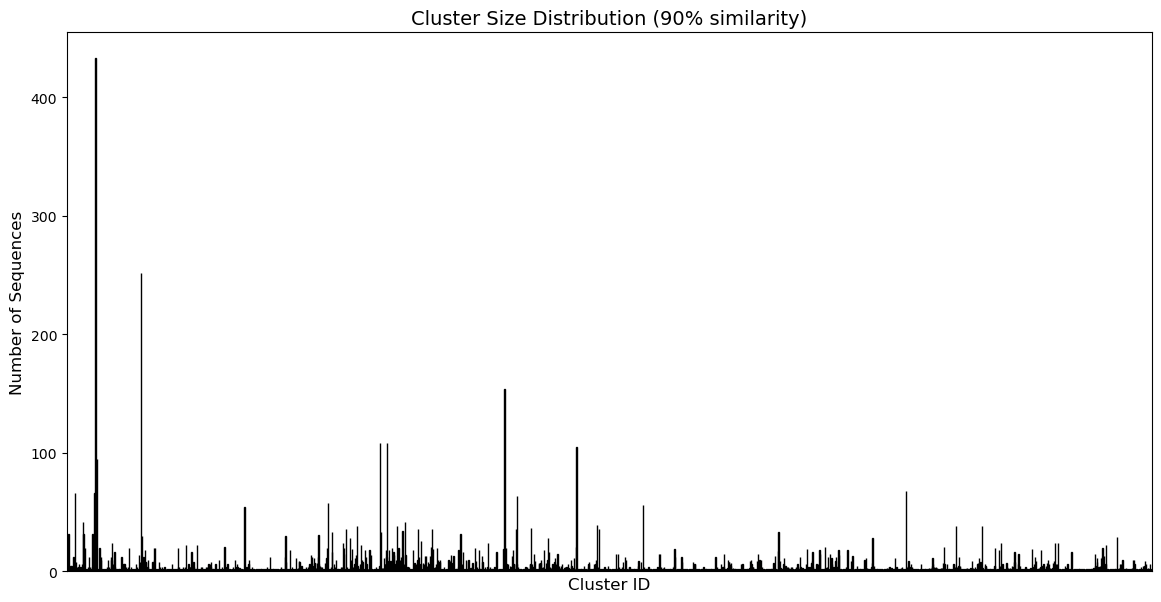

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Number of unique clusters
num_unique_clusters = df_mmseqs2_esm2_unimol['mmseqs_representative_cluster_seq_0p9_similarity'].nunique()
print(f"Number of unique clusters: {num_unique_clusters}")

# Cluster size distribution
cluster_counts = df_mmseqs2_esm2_unimol.groupby('mmseqs_representative_cluster_seq_0p9_similarity').size()

plt.figure(figsize=(14, 7))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Size Distribution (90% similarity)', fontsize=14)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Sequences', fontsize=12)
plt.xticks([])  # remove x-tick labels
#plt.show()

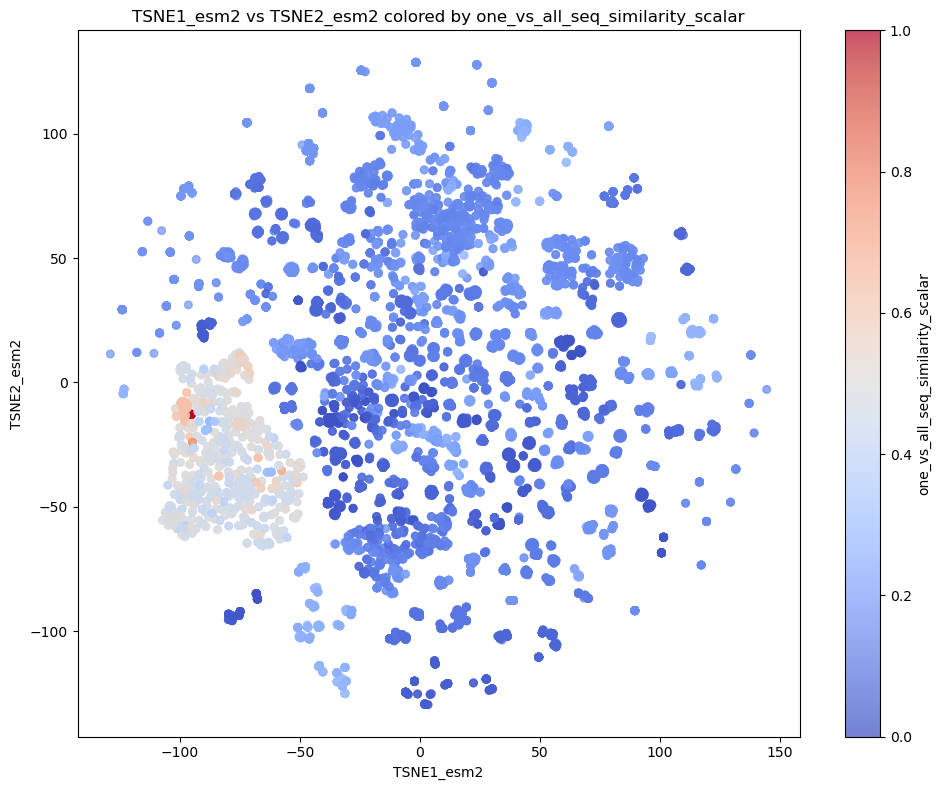

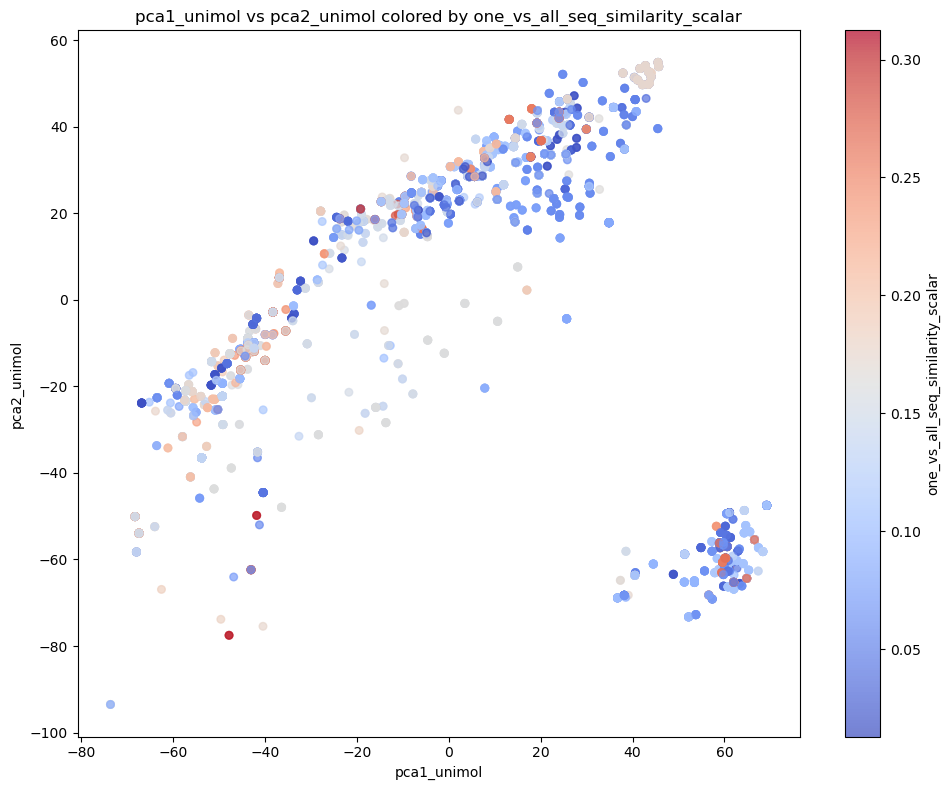

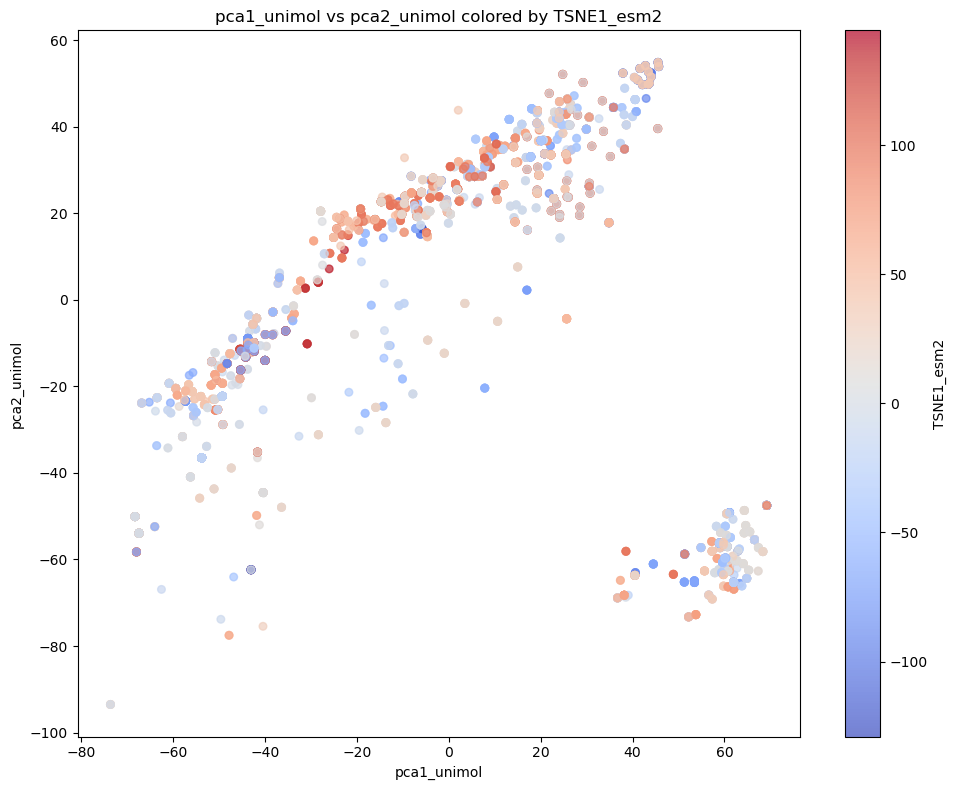

In [59]:
def plot_embedding_colored_by_property(df, x='UMAP1_esm2', y='UMAP2_esm2', color_by='mds1'):
    """
    Plot UMAP/t-SNE/PCA reduced embeddings colored by mmseqs2 cluster sequence similarity.
    """
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df[x], df[y], c=df[color_by], cmap='coolwarm', s=30, alpha=0.7)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y} colored by {color_by}')
    plt.colorbar(scatter, label=color_by)
    plt.tight_layout()
    plt.show()

plot_embedding_colored_by_property(df_mmseqs2_esm2_unimol, x='TSNE1_esm2', y='TSNE2_esm2', color_by='one_vs_all_seq_similarity_scalar')
plot_embedding_colored_by_property(df_mmseqs2_esm2_unimol, x='pca1_unimol', y='pca2_unimol', color_by='one_vs_all_seq_similarity_scalar')
plot_embedding_colored_by_property(df_mmseqs2_esm2_unimol, x='pca1_unimol', y='pca2_unimol', color_by='TSNE1_esm2')

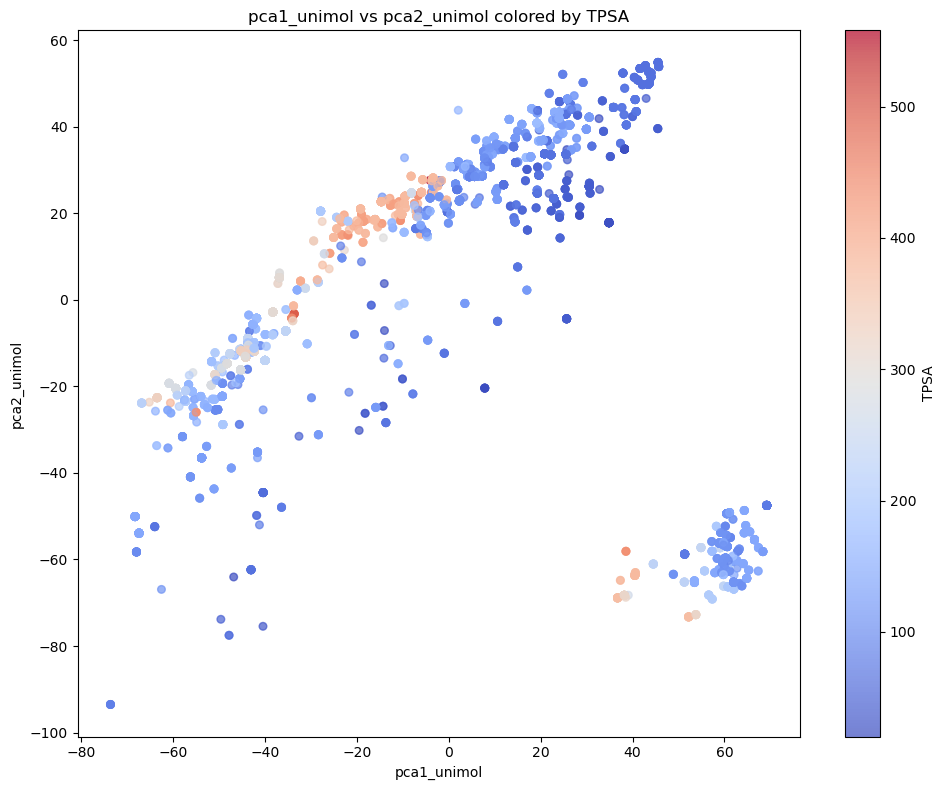

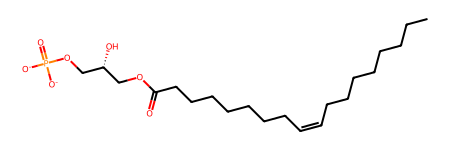

In [140]:
# Dimensionality reduced substrate embeddings colored by molecular descriptors

plot_embedding_colored_by_property(df_mmseqs2_esm2_unimol, x='pca1_unimol', y='pca2_unimol', color_by='TPSA')

filtered_df = df_mmseqs2_esm2_unimol[(df_mmseqs2_esm2_unimol['pca1_unimol'] > -20) & (df_mmseqs2_esm2_unimol['pca2_unimol'] > 10)]
unique_filtered_df = filtered_df.drop_duplicates(subset='substrates_split').reset_index(drop=True)
smile_string = unique_filtered_df.substrates_split[111]

# Take a look at the substrates
from rdkit import Chem
Chem.MolFromSmiles(smile_string)


/tmp/ipykernel_76659/3212820435.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = 'Euclidian distance between centroids of UniMol embeddings averaged per MMseqs2 clusters',


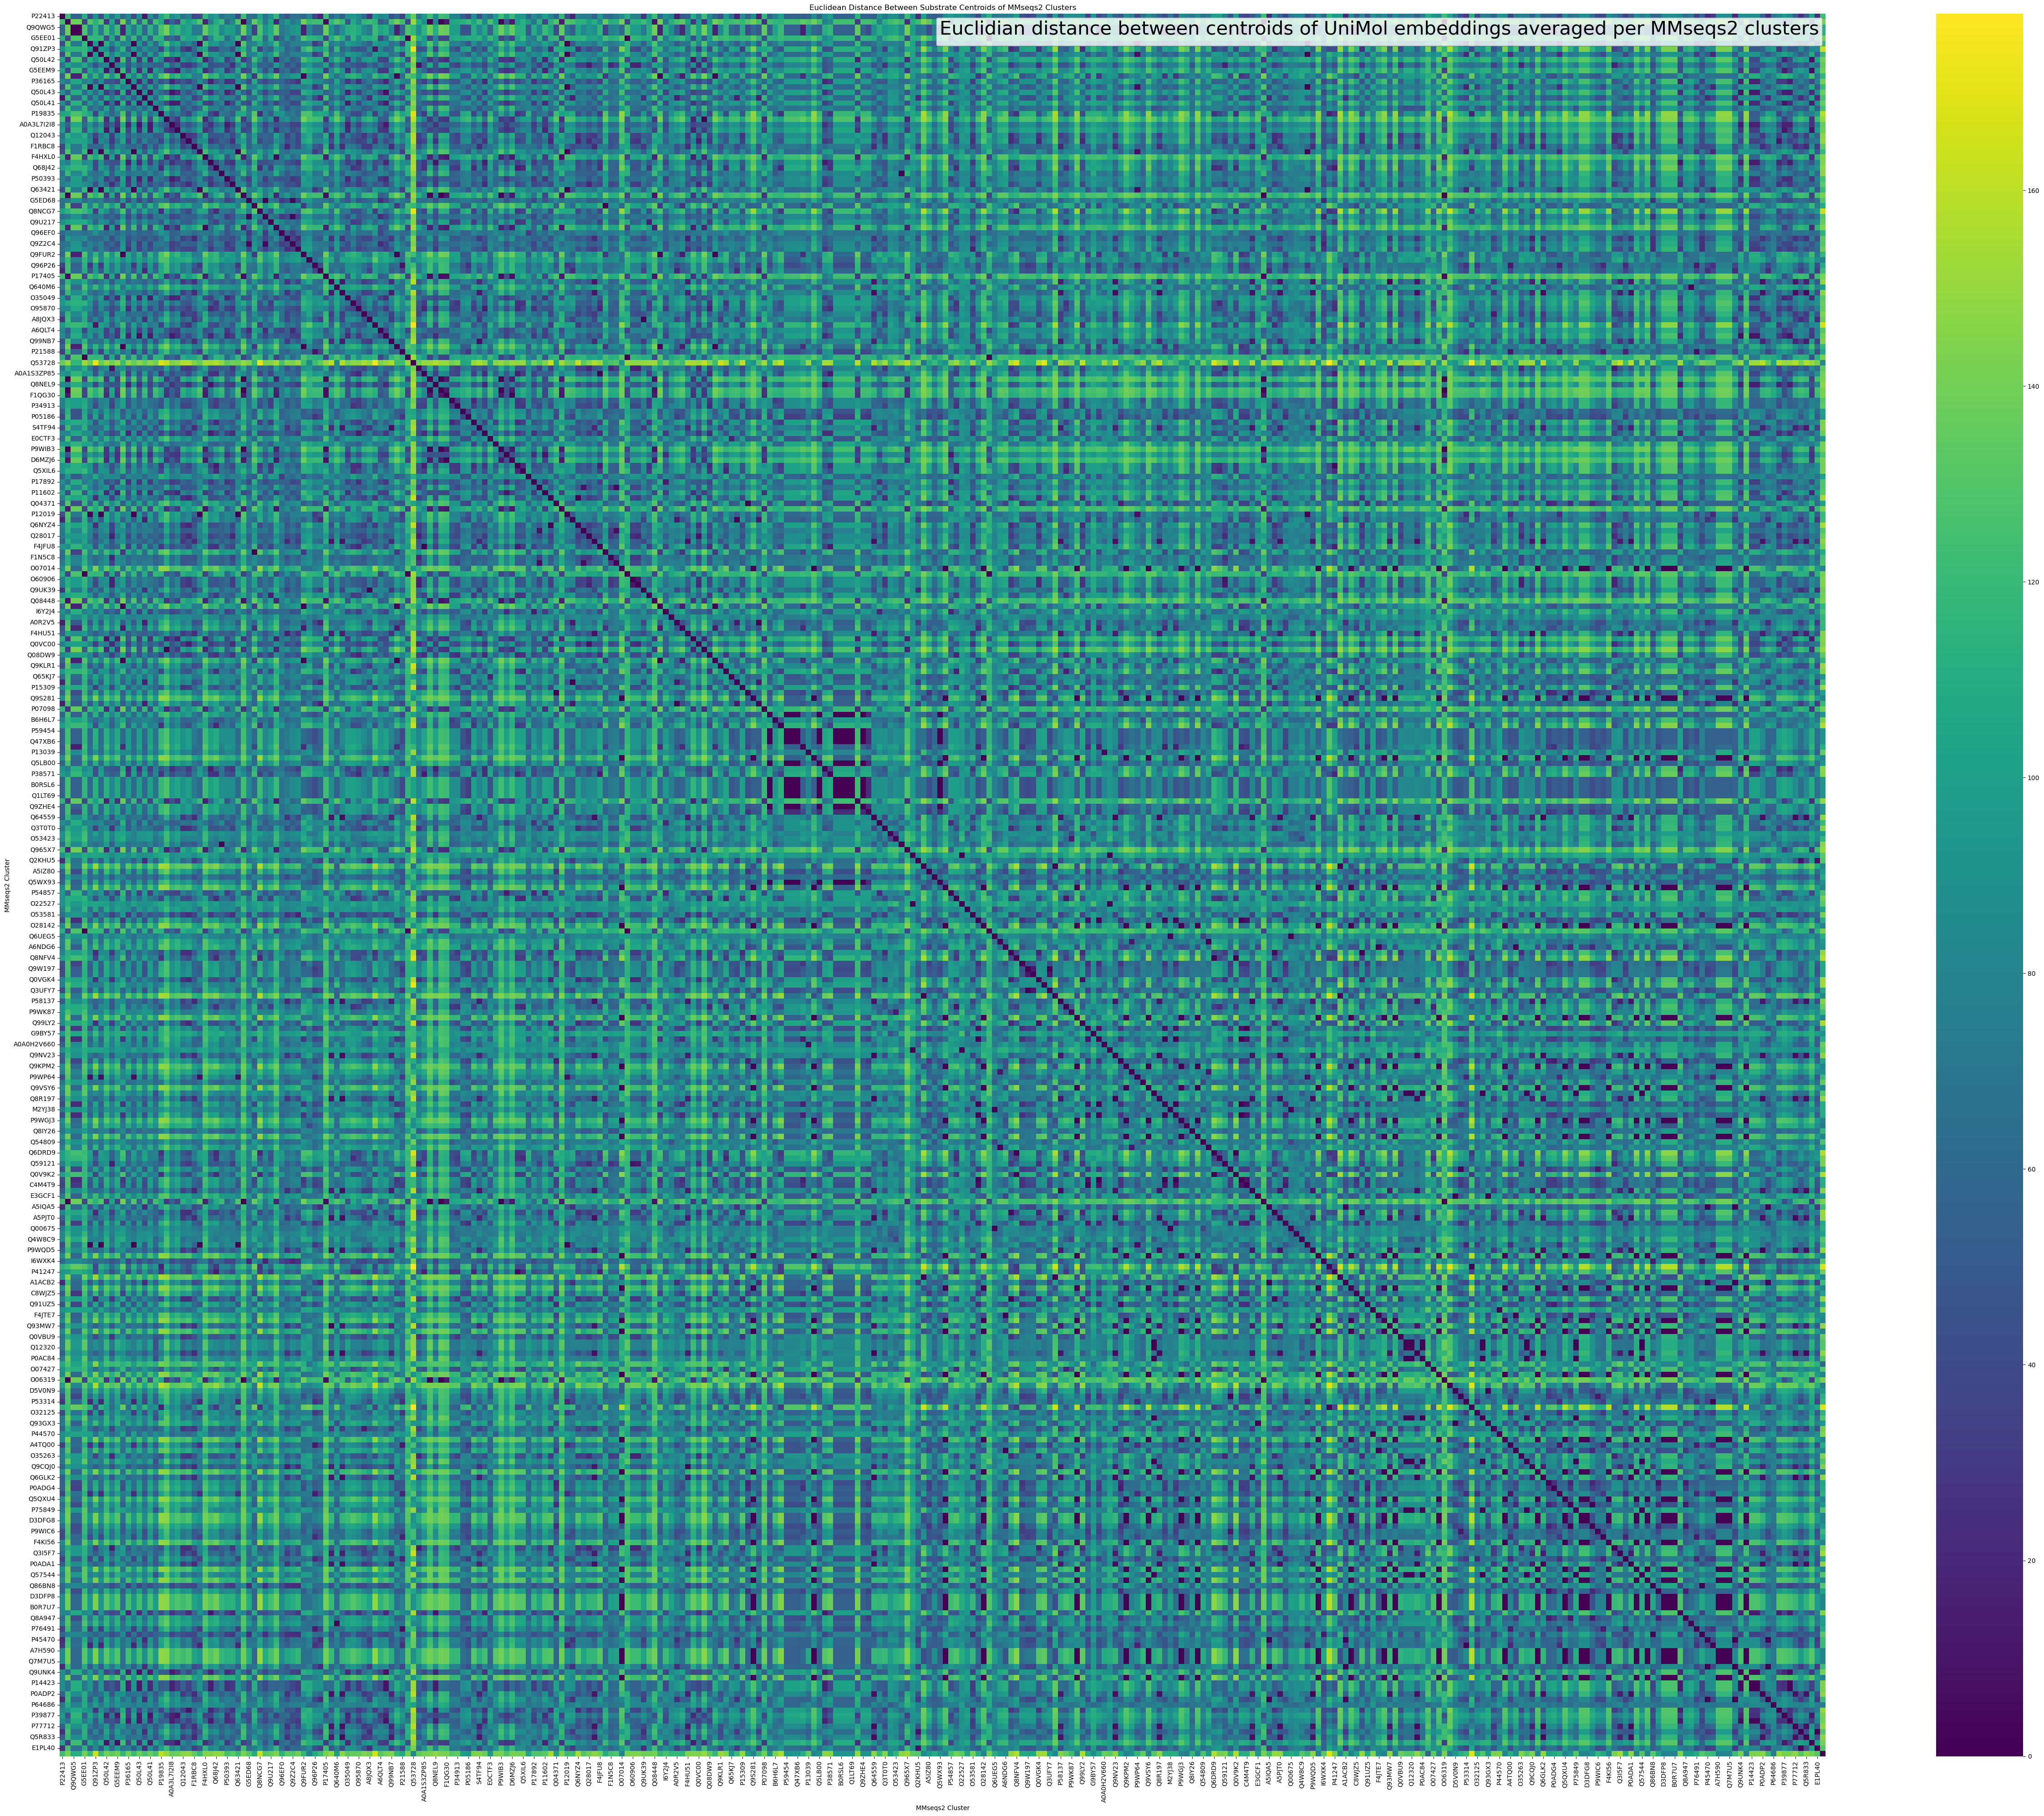

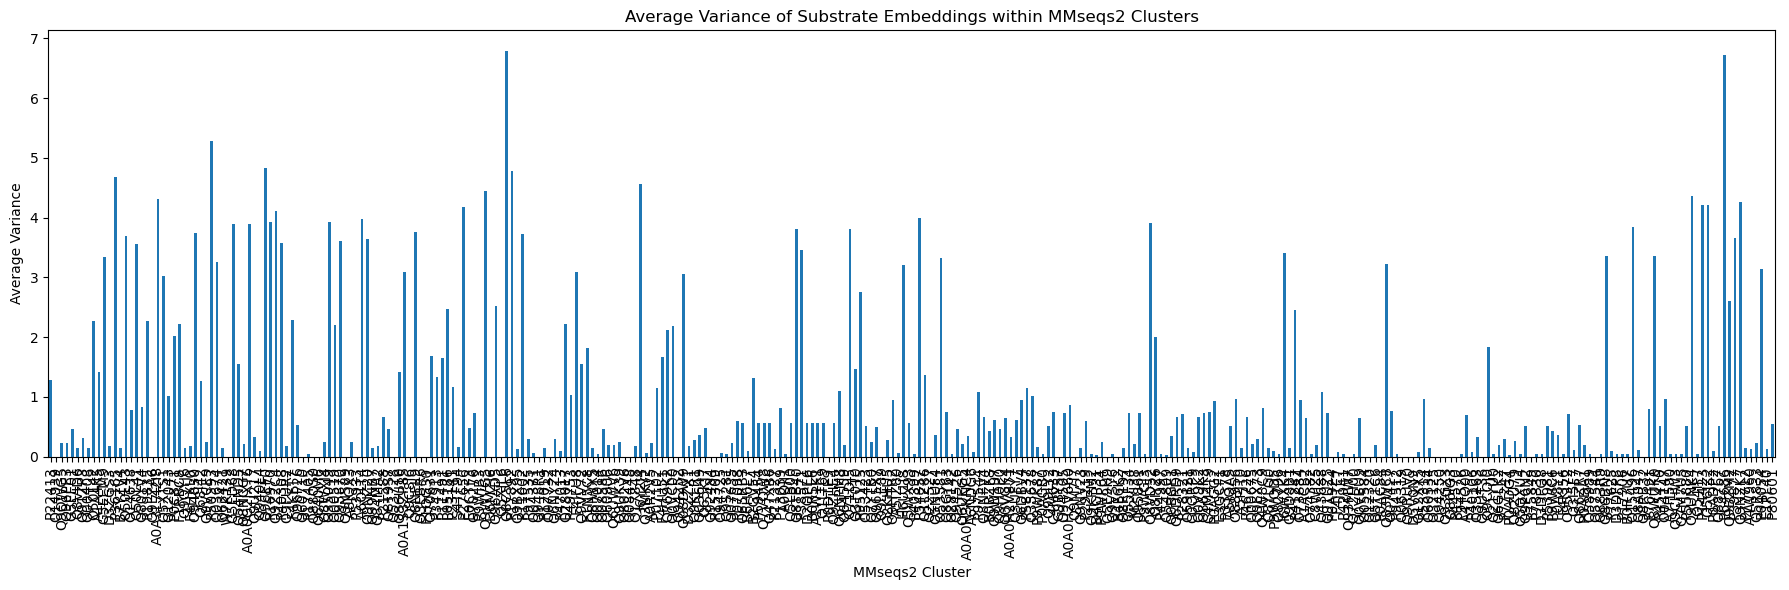

In [172]:
# Quantitative analysis of substrate similarity within MMseqs2 clusters

import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import seaborn as sns

def quantitative_substrate_analysis(df, embedding_column='unimol_repr', cluster_column='mmseqs_representative_cluster_seq_0p9_similarity'):
    """
    Calculates centroid distances and variances for visualization.
    """
    grouped = df.groupby(cluster_column)[embedding_column].apply(list)
    cluster_centroids = {}
    cluster_variances = {}
    for cluster, embeddings_list in grouped.items():
        if embeddings_list:
            valid_embeddings = []

            for emb in embeddings_list:
                # Unwrap list if necessary (i.e. [np.ndarray] → np.ndarray)
                if isinstance(emb, list) and len(emb) == 1 and isinstance(emb[0], np.ndarray):
                    emb = emb[0]

                # Check if it's a valid NumPy array
                if isinstance(emb, np.ndarray) and emb.size > 0:
                    flat = emb.flatten()
                    if not np.any(np.isnan(flat)) and not np.any(np.isinf(flat)):
                        valid_embeddings.append(flat)

            # Only compute if valid embeddings exist
            if valid_embeddings:
                embeddings_array = np.vstack(valid_embeddings)  # stack all vectors
                cluster_centroids[cluster] = np.mean(embeddings_array, axis=0)
                cluster_variances[cluster] = np.mean(np.var(embeddings_array, axis=0))
            else:
                cluster_variances[cluster] = np.nan


    clusters = list(cluster_centroids.keys())
    distance_matrix = pd.DataFrame(index=clusters, columns=clusters)
    for i, cluster1 in enumerate(clusters):
        for j, cluster2 in enumerate(clusters):
            if cluster1 in cluster_centroids and cluster2 in cluster_centroids:
                dist = euclidean(cluster_centroids[cluster1], cluster_centroids[cluster2])
                distance_matrix.loc[cluster1, cluster2] = dist
            else:
                distance_matrix.loc[cluster1, cluster2] = np.nan

    variance_df = pd.Series(cluster_variances, name='Average Variance')
    return distance_matrix, variance_df


distance_matrix, variance_df = quantitative_substrate_analysis(df_mmseqs2_esm2_unimol, cluster_column='mmseqs_representative_cluster_seq_0p6_similarity')

# Group by cluster according to sequence similarity between clusters
cluster_similarities = df_mmseqs2_esm2_unimol.groupby('mmseqs_representative_cluster_seq_0p9_similarity')['one_vs_all_seq_similarity_scalar'].mean()
sorted_clusters = cluster_similarities.sort_values().index.tolist()
filtered_clusters = [x for x in sorted_clusters if x in distance_matrix.index]
distance_matrix = distance_matrix.loc[filtered_clusters, filtered_clusters]
variance_df = variance_df.loc[filtered_clusters]

# Heatmap of Centroid Distances
plt.figure(figsize=(50, 40))
sns.heatmap(distance_matrix.astype(float), annot=False, cmap='viridis', fmt=".2f")
plt.title('Euclidean Distance Between Substrate Centroids of MMseqs2 Clusters')
plt.xlabel('MMseqs2 Cluster')
plt.ylabel('MMseqs2 Cluster')
plt.legend(title = 'Euclidian distance between centroids of UniMol embeddings averaged per MMseqs2 clusters', 
    fontsize = 'large', 
    title_fontsize = '30')
plt.tight_layout()
plt.show()


# Bar Chart of Cluster Variance
plt.figure(figsize=(18, 6))
variance_df.plot(kind='bar')
plt.title('Average Variance of Substrate Embeddings within MMseqs2 Clusters')
plt.xlabel('MMseqs2 Cluster')
plt.ylabel('Average Variance')
plt.tight_layout()
plt.show()

# The centroid gives you a central "average" UniMol embedding for the substrates associated with each enzyme cluster.
# The average variance gives you a measure of how spread out the substrate embeddings are within each cluster. 
# A lower variance suggests that the substrates of enzymes in that cluster are more structurally similar to each other (according to UniMol).

# The Euclidean distance  between the centroids of two different clusters gives you an idea 
# of how structurally similar the average preferred substrates are for those two enzyme clusters. 
# Smaller distances suggest more similar average substrate preferences.


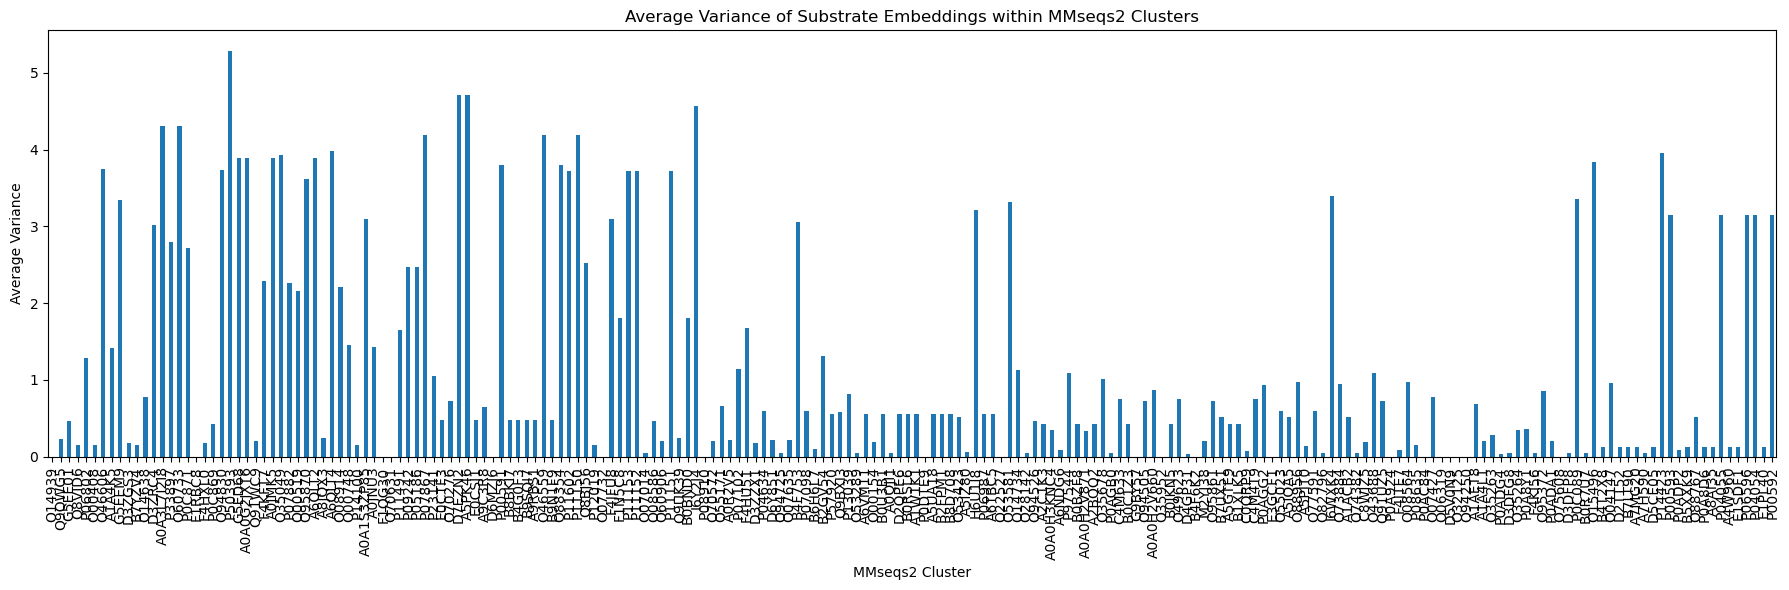

In [154]:
# Bar Chart of Cluster Variance
plt.figure(figsize=(18, 6))
variance_df.plot(kind='bar')
plt.title('Average Variance of Substrate Embeddings within MMseqs2 Clusters')
plt.xlabel('MMseqs2 Cluster')
plt.ylabel('Average Variance')
plt.tight_layout()
plt.show()